In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

X=df.iloc[:,:-1]
X_Sub=df_test.iloc[:,:]
y=df.iloc[:,-1]

In [4]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X=imp.fit_transform(X)
col=X_Sub.columns
X=pd.DataFrame(X,columns=col)

In [5]:
cat=['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Duration']
num=[i for i in X.columns if i not in cat]

In [6]:
X1=X.loc[:,cat]
X2=X.loc[:,num]

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X1=X1.apply(le.fit_transform)

In [9]:
X=pd.concat([X1,X2],axis=1)

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   City_Code                50882 non-null  int32 
 1   Accomodation_Type        50882 non-null  int32 
 2   Reco_Insurance_Type      50882 non-null  int32 
 3   Is_Spouse                50882 non-null  int32 
 4   Health Indicator         50882 non-null  int32 
 5   Holding_Policy_Duration  50882 non-null  int32 
 6   ID                       50882 non-null  object
 7   Region_Code              50882 non-null  object
 8   Upper_Age                50882 non-null  object
 9   Lower_Age                50882 non-null  object
 10  Holding_Policy_Type      50882 non-null  object
 11  Reco_Policy_Cat          50882 non-null  object
 12  Reco_Policy_Premium      50882 non-null  object
dtypes: int32(6), object(7)
memory usage: 3.9+ MB


##  Univariate Selection

In [12]:
#apply SelectKBest class to extract top 10 best features
best_features=SelectKBest(score_func=chi2,k=10)
fit=best_features.fit(X,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)


In [16]:
#concat two dataframes for better visualization 
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Scores']
#naming the dataframe columns
print(featureScores.nlargest(13,'Scores'))  #print 10 best features

                      Specs        Scores
6                        ID  11483.328483
12      Reco_Policy_Premium   9829.942822
11          Reco_Policy_Cat   1768.726386
7               Region_Code     74.805013
5   Holding_Policy_Duration      7.662646
2       Reco_Insurance_Type      3.965972
8                 Upper_Age      2.612166
9                 Lower_Age      1.572930
1         Accomodation_Type      0.756115
3                 Is_Spouse      0.632296
10      Holding_Policy_Type      0.522117
4          Health Indicator      0.453390
0                 City_Code      0.122643


In [17]:
'''
From here we confirmed that using univariate selection the most important features are
1) 12      Reco_Policy_Premium   9829.942822
2) 11          Reco_Policy_Cat   1768.726386
3) 7               Region_Code     74.805013
4) 5   Holding_Policy_Duration      7.662646
5) 2       Reco_Insurance_Type      3.965972
6) 8                 Upper_Age      2.612166
'''

'\nFrom here we confirmed that using univariate selection the most important features are\n1) 12      Reco_Policy_Premium   9829.942822\n2) 11          Reco_Policy_Cat   1768.726386\n3) 7               Region_Code     74.805013\n4) 5   Holding_Policy_Duration      7.662646\n5) 2       Reco_Insurance_Type      3.965972\n6) 8                 Upper_Age      2.612166\n'

##  Feature Importance

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)


ExtraTreesClassifier()

In [19]:
#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_)


[0.10233712 0.01433409 0.00409973 0.00527461 0.07301172 0.06891928
 0.13151087 0.13202317 0.0971816  0.0982581  0.03514033 0.1077325
 0.13017687]


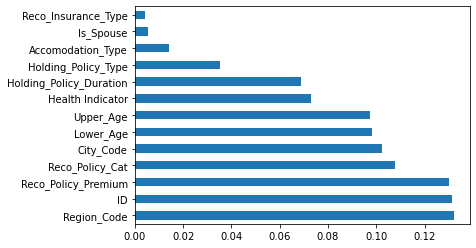

In [21]:

#plot graph of feature importances for better visualization
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [22]:
# Final Feature selection after these two observations
'''
Reco_Policy_Premium
Region_Code
Reco_Policy_Cat
Upper_Age
Holding_Policy_Duration
Reco_Insurance_Type

'''

'\nReco_Policy_Premium\nRegion_Code\nReco_Policy_Cat\nUpper_Age\nHolding_Policy_Duration\n\n\n'